## Question 1

In [21]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
df = pd.read_csv('/workspaces/ml-zoomcamp-works/week-6/homework/data/car_fuel_efficiency.csv')

In [23]:
df.columns = df.columns.str.lower()

In [24]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [25]:
df.describe().round()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.0,9222.0,8996.0,9704.0,8774.0,9704.0,9202.0,9704.0
mean,200.0,4.0,150.0,3001.0,15.0,2011.0,-0.0,15.0
std,49.0,2.0,30.0,498.0,3.0,7.0,1.0,3.0
min,10.0,0.0,37.0,953.0,6.0,2000.0,-4.0,6.0
25%,170.0,3.0,130.0,2666.0,13.0,2006.0,-1.0,13.0
50%,200.0,4.0,149.0,2993.0,15.0,2012.0,0.0,15.0
75%,230.0,5.0,170.0,3335.0,17.0,2017.0,1.0,17.0
max,380.0,13.0,271.0,4739.0,24.0,2023.0,4.0,26.0


In [26]:
# Check for missing values
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [27]:
# numerical columns
num_cols = df.select_dtypes(include=['number']).columns

# fill missing values
df[num_cols] = df[num_cols].fillna(0.0)

In [28]:
from sklearn.model_selection import train_test_split

# Split off 20% for testing
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

# Split the remaining 80% into training and validation sets
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [29]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [30]:
# Extract the target
y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

In [31]:
# Remove the target from the dataframes
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [32]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=True)

X_train = dv.fit_transform(df_train.to_dict(orient='records'))

In [37]:
from sklearn.tree import DecisionTreeRegressor

# Train a decision tree model
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [39]:
from sklearn.tree import export_text

print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



## Question 2

In [41]:
X_val = dv.transform(df_val.to_dict(orient='records'))

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE: {rmse}")

RMSE: 0.4595777223092726


## Question 3

In [44]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    scores.append((n, rmse))

pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

,n_estimators,rmse
0,10,0.459578
1,20,0.453591
2,30,0.451687
3,40,0.448721
4,50,0.446657
5,60,0.445460
6,70,0.445126
7,80,0.444984
8,90,0.444861
9,100,0.444652


In [49]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

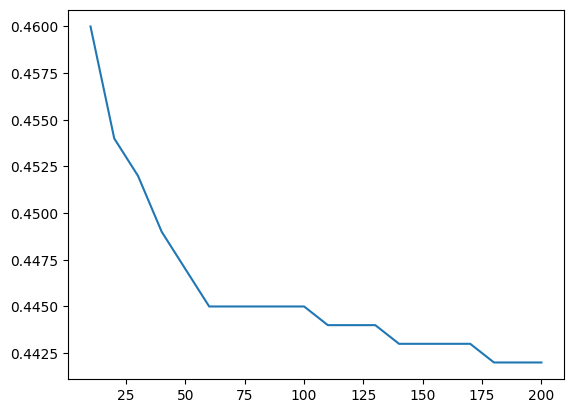

In [52]:
plt.plot(df_scores.n_estimators, df_scores.rmse.round(3))

## Question 4

In [53]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        scores.append((d, n, rmse))

df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'rmse'])

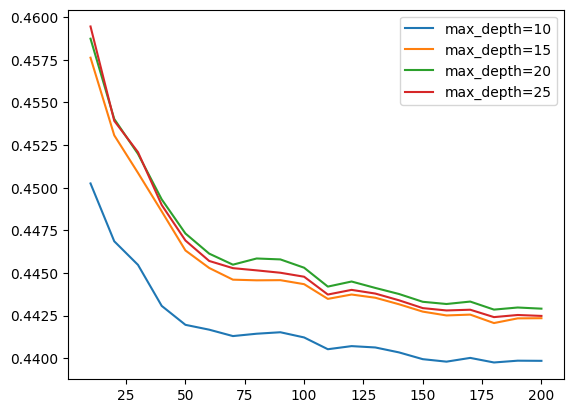

In [55]:
for d in [10, 15, 20, 25]:
    plt.plot(df_scores[df_scores.max_depth == d].n_estimators, df_scores[df_scores.max_depth == d].rmse,
             label=f'max_depth={d}')

plt.legend()
plt.show()

## Question 5

In [67]:
dt = RandomForestRegressor(
    max_depth=20,
    n_estimators=10,
    random_state=1,
    n_jobs=-1
)

dt.fit(X_train, y_train)

feature_importances = dt.feature_importances_

feature_names = dv.get_feature_names_out()

feature_importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

feature_importances_df.sort_values(by='importance', ascending=False)

,feature,importance
13,vehicle_weight,0.959150
6,horsepower,0.015998
0,acceleration,0.011480
3,engine_displacement,0.003273
7,model_year,0.003212
8,num_cylinders,0.002343
9,num_doors,0.001635
12,origin=USA,0.000540
11,origin=Europe,0.000519
10,origin=Asia,0.000462


## Question 6

In [70]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names.tolist())
dval = xgb.DMatrix(X_val, label=y_val, feature_names=feature_names.tolist())
watchlist = [(dtrain, 'train'), (dval, 'val')]
rounds = 100


In [113]:
scores = {}

In [116]:
evals_result = {}

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=rounds,
                  verbose_eval=5,
                  evals=watchlist,
                  evals_result=evals_result)

[0]	train-rmse:2.28944	val-rmse:2.34561
[5]	train-rmse:1.41247	val-rmse:1.44988
[10]	train-rmse:0.91008	val-rmse:0.94062
[15]	train-rmse:0.63402	val-rmse:0.66672
[20]	train-rmse:0.48983	val-rmse:0.53064
[25]	train-rmse:0.41881	val-rmse:0.46891
[30]	train-rmse:0.38342	val-rmse:0.44289
[35]	train-rmse:0.36435	val-rmse:0.43250
[40]	train-rmse:0.35343	val-rmse:0.42746
[45]	train-rmse:0.34621	val-rmse:0.42595
[50]	train-rmse:0.33998	val-rmse:0.42498
[55]	train-rmse:0.33480	val-rmse:0.42449
[60]	train-rmse:0.33054	val-rmse:0.42456
[65]	train-rmse:0.32602	val-rmse:0.42493
[70]	train-rmse:0.32202	val-rmse:0.42503
[75]	train-rmse:0.31895	val-rmse:0.42526
[80]	train-rmse:0.31667	val-rmse:0.42563
[85]	train-rmse:0.31440	val-rmse:0.42574
[90]	train-rmse:0.31059	val-rmse:0.42586
[95]	train-rmse:0.30625	val-rmse:0.42611
[99]	train-rmse:0.30419	val-rmse:0.42623


In [117]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = pd.DataFrame({
    'num_iter': range(1, rounds + 1),
    'train_rmse': evals_result['train']['rmse'],
    'val_rmse': evals_result['val']['rmse']
})
key

'eta=0.1'

In [123]:
scores.keys()

dict_keys(['eta=0.3', 'eta=0.1'])

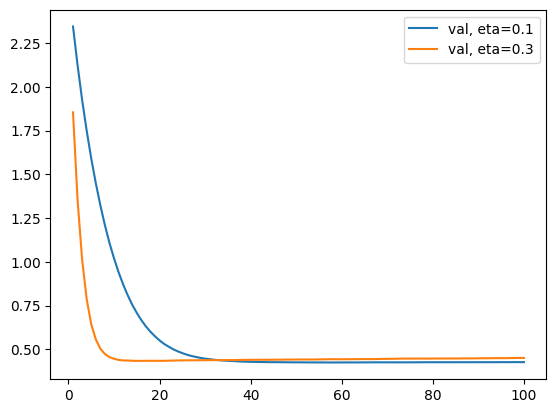

In [119]:
etas = [0.1, 0.3]

for eta in etas:
    df_scores = scores[f'eta={eta}']
    plt.plot(df_scores.num_iter, df_scores.val_rmse,
             label=f'val, eta={eta}')

plt.legend()

In [124]:
comparison = scores['eta=0.1'][['num_iter', 'val_rmse']].merge(
    scores['eta=0.3'][['num_iter', 'val_rmse']], 
    on='num_iter', 
    suffixes=('_0.1', '_0.3')
)
comparison

,num_iter,val_rmse_0.1,val_rmse_0.3
0,1,2.345608,1.854443
1,2,2.124343,1.353529
2,3,1.925969,1.013162
3,4,1.749867,0.786667
4,5,1.590589,0.643181
...,...,...,...
95,96,0.426105,0.449043
96,97,0.426213,0.449539
97,98,0.426295,0.449793
98,99,0.426292,0.450396
